# Practical 1: Gravity and the isostatic state of the lithosphere

**Goal:** Determine the relationship between observations (gravity disturbances and topography) and the isostatic state of the lithosphere.

The isostatic state of the lithosphere (under an Airy or Pratt model) is tied to its density structure. As such, we would expect observations of gravity disturbances to yield some knowlegde on isostasy since they are sensitive to variations in density. In this practical, we will work global observations of gravity and topography, determine a physical/mathematical relationship (a model) between these data and isostasy, test whether our model fits the observations, and reason about why is does or does not. 

## The data

**Download:** [global-geophysical-data.nc](https://github.com/leouieda/lithosphere/raw/main/data/global-geophysical-data.nc) (place it in the **same folder** as this notebook)

The data grids are stored in a [netCDF](https://en.wikipedia.org/wiki/NetCDF) file, which is a very common standard for storing and distributing gridded data. It's used throughout the Earth, ocean, and climate sciences and can be read an manipulated with most software platforms. It contains global grids of gravity, topography, and heat flow. All grids were interpolated onto the same resolution of 0.2 degrees (a compromise between resolution and size of the file) so that we can easily compare and use all of the data together.

* **Gravity**: generated from the [EIGEN-6C4 spherical harmonic model](https://doi.org/10.5880/icgem.2015.1) through the [ICGEM webservice](http://icgem.gfz-potsdam.de/home). It includes two grids: the gravity disturbance calculated with the WGS84 ellipsoid and the Bouguer gravity disturbance calculated using a topography density of 2670 kg/m³. The data for both grids was generated on top of the Earth's surface (the water surface in the oceans and topography on land).
* **Topography and bathymetry**: a downsampled version of [ETOPO1](https://doi.org/10.7289/V5C8276M) and includes a version smoothed using a Gaussian filter with 1 degree width (~100 km).
* **Heat flow**: an upsampled version of the compilation by [Lucazeau (2019)](https://doi.org/10.1029/2019GC008389) (originally 0.5 degree resolution).
* **Lithosphere age (oceanic)**: a downsampled version of the grid by [Müller et al. (2008)](https://doi.org/10.1029/2007GC001743) (originally 6 arc-minutes).

## Import the required libraries

Load the required software to load the data, make maps, and perform calculations.

In [1]:
# For arrays and linear algebra
import numpy as np
# To load and manipulate grids
import xarray as xr
# To make figures and maps
import matplotlib.pyplot as plt
# To add cartographic projections to our maps
import cartopy.crs as ccrs

## Load the data

The best way to work with netCDF grids in Python is with the [xarray](http://xarray.pydata.org/en/stable/) library. It allows us to easily load the data, containing all of the grids and coordinates in the same variable (an `xarray.Dataset`). It also contains many utilities for doing calculations and plotting the grids with matplotlib.

In [2]:
data = xr.load_dataset("global-geophysical-data.nc")

Putting the `xarray.Dataset` at the of a cell will display a nice summary of the data and metadata in the notebook. Click on the arrows to expand variables and the icons on the right to see associated metadata with each data grid.

In [3]:
data

<xarray.Dataset>
Dimensions:              (latitude: 901, longitude: 1800)
Coordinates:
  * latitude             (latitude) float32 -90.0 -89.8 -89.6 ... 89.6 89.8 90.0
  * longitude            (longitude) float32 -180.0 -179.8 ... 179.6 179.8
    height               (latitude, longitude) float32 2.716e+03 ... 15.47
Data variables:
    gravity_disturbance  (latitude, longitude) float32 -27.21 -27.21 ... 24.71
    gravity_bouguer      (latitude, longitude) float32 -331.2 -331.2 ... 312.6
    topography_smoothed  (latitude, longitude) float32 2.796e+03 ... -3.56e+03
    topography           (latitude, longitude) float32 2.716e+03 ... -4.213e+03
    heat_flow            (latitude, longitude) float32 75.2 75.2 ... 84.7 84.7
    lithosphere_age      (latitude, longitude) float32 nan nan ... 55.46 55.46

We can access individual data grids (called `xarray.DataArray`s) like so:

In [4]:
data.gravity_disturbance

<xarray.DataArray 'gravity_disturbance' (latitude: 901, longitude: 1800)>
array([[-27.20595 , -27.20595 , -27.20595 , ..., -27.20595 , -27.20595 ,
        -27.20595 ],
       [-35.904896, -35.90482 , -35.90467 , ..., -35.967697, -35.96762 ,
        -35.904972],
       [-34.5061  , -34.44337 , -34.438587, ..., -34.511414, -34.511185,
        -34.506325],
       ...,
       [ 10.470124,  10.344746,  10.281869, ...,  10.783781,  10.658393,
         10.595507],
       [ 19.901314,  19.9012  ,  19.901089, ...,  19.83917 ,  19.839048,
         19.83893 ],
       [ 24.713697,  24.713697,  24.713697, ...,  24.713697,  24.713697,
         24.713697]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -90.0 -89.8 -89.6 -89.4 ... 89.6 89.8 90.0
  * longitude  (longitude) float32 -180.0 -179.8 -179.6 ... 179.4 179.6 179.8
    height     (latitude, longitude) float32 2.716e+03 2.716e+03 ... 15.47 15.47
Attributes:
    generating_institute:  gfz-potsdam
    generating_date:       2021/04/09
    product_type:          gravity_field
    body:                  earth
    modelname:             EIGEN-6C4
    max_used_degree:       2190
    tide_system:           tide_free
    functional:            gravity_earth (centrifugal term included)
    unit:                  mgal
    refsysname:            WGS84
    gmrefpot:              3.98600441800E+14 m**3/s**2
    radiusrefpot:          6378137.000 m
    flatrefpot:            3.352810664747480E-03 (1/298.25722356300)
    omegarefpot:           7.29211500000E-05 1/s
    normal_potential:      6.263685171456948E+07 m**2/s**2
    long_lat_unit:         degree
    latlimit_north:        90.000000000000
    latlimit_south:        -90.000000000000
    longlimit_west:        -180.00000000000
    longlimit_east:        180.00000000000
    gridstep:              0.20000000000000
    latitude_parallels:    901
    longitude_parallels:   1801
    number_of_gridpoints:  1622701
    gapvalue:              9999999.0000
    weighted_mean:         9.7968678E+05 mgal
    maxvalue:              9.8333709E+05 mgal
    minvalue:              9.7677548E+05 mgal
    signal_wrms:           1.5243707E+03 mgal
    grid_format:           long_lat_height_value
    attributes:            longitude latitude h_over_geoid gravity_earth
    attributes_units:      deg. deg. meter mgal

In [5]:
data.topography

<xarray.DataArray 'topography' (latitude: 901, longitude: 1800)>
array([[ 2715.59  ,  2715.59  ,  2715.59  , ...,  2715.59  ,  2715.59  ,
         2715.59  ],
       [ 2734.4253,  2734.4255,  2734.426 , ...,  2734.4243,  2734.4246,
         2734.425 ],
       [ 2818.3162,  2818.317 ,  2817.3176, ...,  2819.314 ,  2819.3147,
         2818.3154],
       ...,
       [-4155.5356, -4155.5366, -4155.538 , ..., -4156.5317, -4156.533 ,
        -4155.534 ],
       [-4192.9375, -4191.938 , -4190.9385, ..., -4194.9365, -4194.937 ,
        -4193.9375],
       [-4212.53  , -4212.53  , -4212.53  , ..., -4212.53  , -4212.53  ,
        -4212.53  ]], dtype=float32)
Coordinates:
  * latitude   (latitude) float32 -90.0 -89.8 -89.6 -89.4 ... 89.6 89.8 90.0
  * longitude  (longitude) float32 -180.0 -179.8 -179.6 ... 179.4 179.6 179.8
    height     (latitude, longitude) float32 2.716e+03 2.716e+03 ... 15.47 15.47
Attributes:
    generating_institute:  gfz-potsdam
    generating_date:       2021/04/09
    product_type:          topography
    body:                  earth
    modelname:             etopo1-2250
    functional:            topography_grd (grid)=>bi-linear interpolation
    unit:                  meter
    refsysname:            WGS84
    radiusrefsys:          6378137.000 m
    flatrefsys:            3.352810664747480E-03 (1/298.25722356300)
    long_lat_unit:         degree
    latlimit_north:        90.000000000000
    latlimit_south:        -90.000000000000
    longlimit_west:        -180.00000000000
    longlimit_east:        180.00000000000
    gridstep:              0.20000000000000
    latitude_parallels:    901
    longitude_parallels:   1801
    number_of_gridpoints:  1622701
    gapvalue:              99999.0000
    weighted_mean:         -2.3852818E+03 meter
    maxvalue:              7.2090000E+03 meter
    minvalue:              -1.0712000E+04 meter
    signal_wrms:           2.5083590E+03 meter
    grid_format:           long_lat_value
    attributes:            longitude latitude topography_grd
    attributes_units:      deg. deg. meter

## Plotting the grids

`xarray.DataArray` objects provide a `.plot` method that will display the grid data in a map, including setting appropriate colorbars and labels. This is the quickest way to visualize our data. You can provide quite a few argument to `plot` to customize the figure. Here, we will specify the figure size (in inches) so that we can actually see some things.

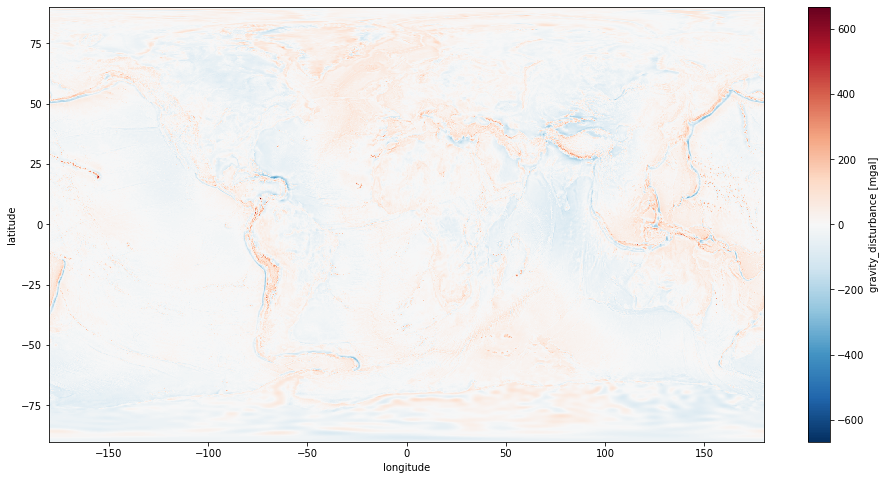

In [6]:
data.gravity_disturbance.plot(figsize=(16, 8))

Notice that the colorbar is centered and all axis are labeled automatically! 🚀

The map we just plotted is showing the **gravity disturbance** for the entire globe. The most noteworthy thing about this map is that disturbance values are very small except for a few places. These generally coincide with **convergent plate boundaries** and **volcanic island chains**, both places where regional isostasy (Airy and Pratt models) are known to not be applicable. 

The gravity disturbance is a good indicator of the overall isostatic state of a region. By looking at the map, we can get a **qualitative idea of regional isostasy** but we have no good way of comparing different regions quantitavely. For that, we will need to create a model of what observations would be when the Airy or Pratt models of isostasy apply. We can then assess **how well this model fits our data**.

---

## **Your turn!**

Plot the other grids in our dataset: Bouguer gravity disturbance, topography, and smoothed topography. Try using the `"terrain"` colormap for the topography.

---

## Caveat about plotting latitude/longitude coordinates

In the plots above, the pseudo-color maps have evenly spaced longitude and latitude axis. This is troublesome because the Earth is not flat. Longitude lines get closer together as latitude increases towards the poles, which creates distortions in the map. Distortions are unavoidable but we can control them better by using [cartographic projections](https://en.wikipedia.org/wiki/Map_projection). This is handled by the [Cartopy library](https://scitools.org.uk/cartopy/docs/latest/). 

As an example, let's plot one of the global grids using the [sinusoidal projection](https://en.wikipedia.org/wiki/Sinusoidal_projection).

**Warning:** Many global projections (Robinon, Mollweide, etc) can be extremely slow on large grids like these. 

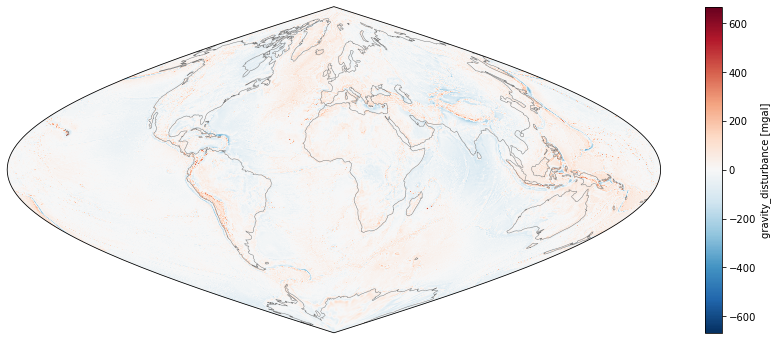

In [7]:
plt.figure(figsize=(16, 6))
# Set the projection in the matplotlib axes 
ax = plt.axes(projection=ccrs.Sinusoidal())
# The transform argument specified which projection the input data are in.
# In our case, they are not projected so we have to specify the 
# PlateCarree projection with is basically just longitude/latitude.
plot = data.gravity_disturbance.sel(longitude=slice(-180, 179)).plot(ax=ax, transform=ccrs.PlateCarree())
# Use the returned axes to plot coastlines on the map.
# Only works if the axes is created using a 
ax.coastlines(color="gray", linewidth=0.5)

## Why the disturbance is small

Let's assume that the Earth's crust is a single homogeneous layer (constant density) and it's in Airy-type isostatic equilibrium. In this case, the only density contrasts left between the real Earth and the reference Earth will be:

1. The contrast between crust and mantle due to the undulation of the real Moho.
1. The effect of the topographic masses outside of the reference Earth.
1. The contrast between ocean water in the real Earth and crust on the reference Earth.

<figure>
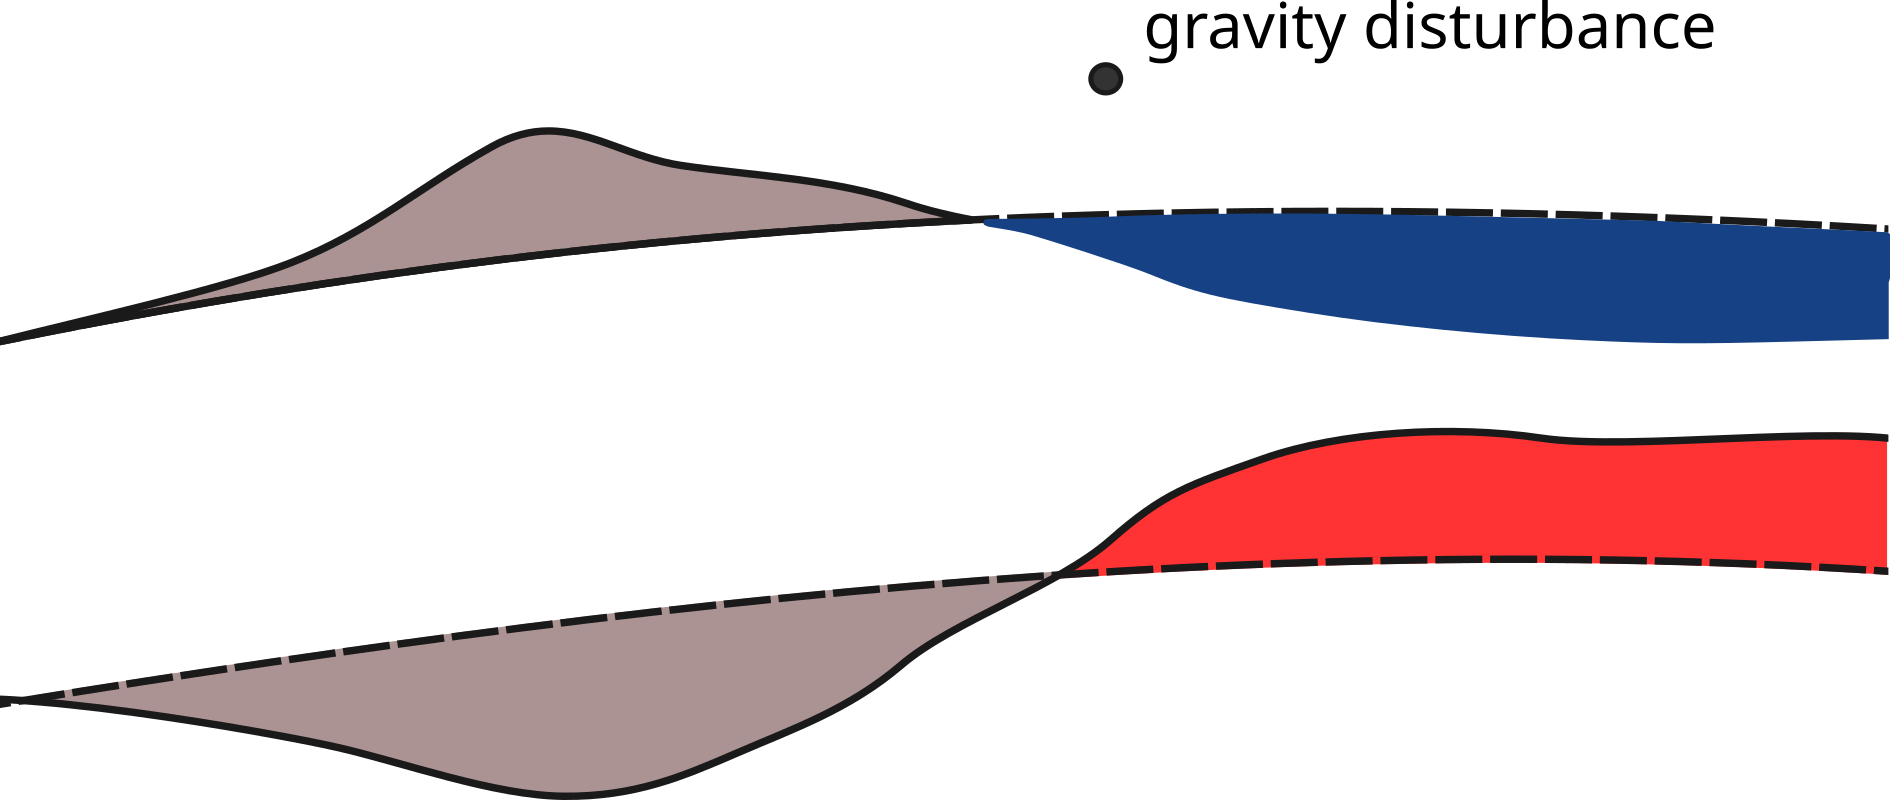
<figcaption>
<em>Sketch of the density contrasts that generate gravitational attraction in the gravity disturbance measured at a point.</em>
</figcaption>
</figure>

We can approximate the gravitational attraction of topographic masses with a thickness $h$ and density $\rho$ by using the Bouguer slab equation:

$$ g_{h} \approx 2 \pi G \rho_c h $$

in which $G$ is the gravitational constant and $\rho_c$ is the density of the crust. This is gives us a simple equation to calculate the effect of topography or the Moho undulation (by using a different $\rho$ and $h$). 

Under the assumption of Airy isostasy, the thickness of the root (the Moho undulation $r$) is related to $h$ and the density of the crust $\rho_c$ and upper mantle $\rho_m$:

$$ r = \dfrac{\rho_c}{\rho_m - \rho_c} h $$

The gravitational effect of this root can be approximated with the Bouguer slab equation as well:

$$ g_{r} \approx 2 \pi G (\rho_c - \rho_m) r $$

Substituting the equation for $r$ from the Airy model we get:

$$ g_{r} -\approx 2 \pi G \rho_c h $$

In other words, **the gravitational effects of the crustal root (Moho undulation) should cancel out with the effect of topography** under the assumption of Airy isostasy. 


## On your own: Pratt isostasy

Workout what the gravity disturbance would be in the case of Pratt isostasy, where compensation is achieved by changing the density instead of adding a root. Follow the same steps that we did for Airy isostasy and you should be able to arrive at a similar solution.

## Modelling gravity vs topography

When we perform a Bouguer (or topographic) correction, we remove the gravitational effect of the topography and oceans. So our Bouguer gravity disturbance in this simplified state should only include the effect of the Moho undulation. In other words, the observed Bouguer disturbances should obey the following equation:

$$ \delta g_{bg} = 2 \pi G (\rho_c - \rho_m) r $$

or equivalently 

$$ \delta g_{bg} = - 2 \pi G \rho_c h $$

In the oceans, we can apply the same principles to arrive at

$$ \delta g_{bg} = - 2 \pi G (\rho_c - \rho_w) h $$

Both equations state that under the assumption of regional isostatic equilibrium, the observed **Bouguer gravity disturbances are linear functions of the topography and bathymetry**. We also predict that the slope of the curve is different on the contents and oceans.

This is a relationship that we can easily calculate given the topographic heights and the density of the crust and oceans. We can then compare the predictions of our model to observed data.

In [8]:
def bouguer_topo_isostasy(topography, density_crust, density_water):
    """
    Function that calculates the expected Bouguer gravity given observed
    topography and densities.
    """
    G = 6.67430e-11
    gravity = xr.where(
        topography >= 0,
        1e5 * -2 * np.pi * G * density_crust * topography,
        1e5 * -2 * np.pi * G * (density_crust - density_water) * topography,
    )
    return gravity    

Now that we have a model, we can use it to make predictions of observations.

In [9]:
prediction = bouguer_topo_isostasy(data.topography, density_crust=2670, density_water=1040)

Let's plot the values of our predicted and observed gravity versus observed topography.

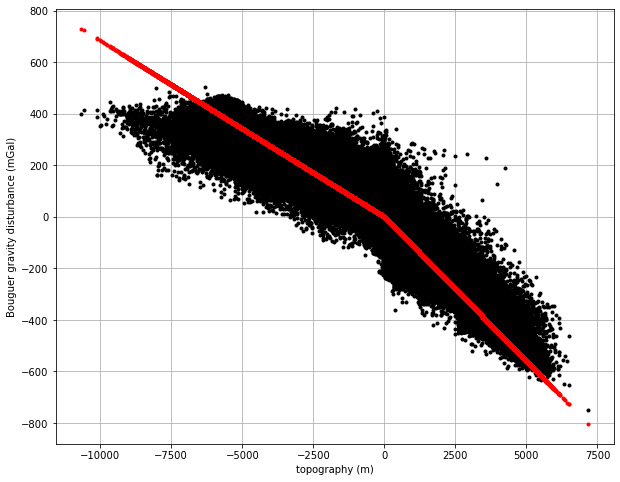

In [10]:
plt.figure(figsize=(10, 8))
# Use .values.ravel() to transform our grid into a 1D array for plotting
plt.plot(data.topography.values.ravel(), data.gravity_bouguer.values.ravel(), ".k")
plt.plot(data.topography.values.ravel(), prediction.values.ravel(), ".r")
plt.xlabel("topography (m)")
plt.ylabel("Bouguer gravity disturbance (mGal)")
plt.grid()

The plot shows that the model agrees relatively well with our data. In general, there are two linear trends and their slopes change when crossing 0 height.

But the fit is not very good for the deepest parts of the oceans. Remember that these depths occur at subduction zones, where we don't expect regional isostasy to hold.

Now, what happens if we use a version of the topography that was smoothed to remove wavelengths less that approximately 100 km? 

In [11]:
prediction_smooth = bouguer_topo_isostasy(data.topography_smoothed, density_crust=2670, density_water=1040)

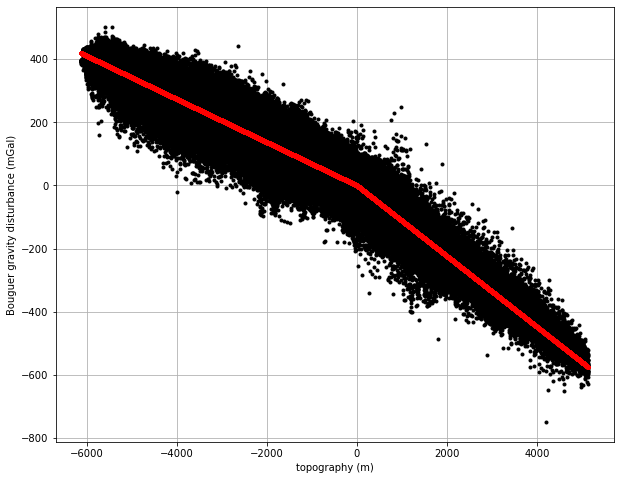

In [12]:
plt.figure(figsize=(10, 8))
plt.plot(data.topography_smoothed.values.ravel(), data.gravity_bouguer.values.ravel(), ".k")
plt.plot(data.topography_smoothed.values.ravel(), prediction_smooth.values.ravel(), ".r")
plt.xlabel("topography (m)")
plt.ylabel("Bouguer gravity disturbance (mGal)")
plt.grid()

The fit is much better to this data! Notice that very deep oceanic areas were removed by the smoothing, as well as the smaller oceanic islands.

This is an indication that **regional Airy-type isostasy describes well the state of the lithosphere at long wavelengths**. Short wavelength topographic features must be supported by different mechanisms.

## The isostatic state of Japan

One of the advantages of xarray is that is lets us slice grids using physical coordinates instead of indices. For example, let's cut a section of our data that corresponds to Japan (where the subduction zone might cause interesting features in the data).

In [13]:
japan = data.sel(latitude=slice(28, 46), longitude=slice(124, 158))
japan

<xarray.Dataset>
Dimensions:              (latitude: 91, longitude: 171)
Coordinates:
  * latitude             (latitude) float32 28.0 28.2 28.4 ... 45.6 45.8 46.0
  * longitude            (longitude) float32 124.0 124.2 124.4 ... 157.8 158.0
    height               (latitude, longitude) float32 23.04 23.62 ... 11.22
Data variables:
    gravity_disturbance  (latitude, longitude) float32 21.01 22.0 ... 24.75
    gravity_bouguer      (latitude, longitude) float32 25.93 27.15 ... 362.7
    topography_smoothed  (latitude, longitude) float32 -94.88 ... -5.015e+03
    topography           (latitude, longitude) float32 -71.96 ... -4.945e+03
    heat_flow            (latitude, longitude) float32 86.5 80.4 ... 55.8 55.8
    lithosphere_age      (latitude, longitude) float32 nan nan ... 115.3 115.4

Now we can plot the smaller grid using a projection and coastlines. In this case, let's go with the [Lambert azimuthal equal-area projection](https://en.wikipedia.org/wiki/Lambert_azimuthal_equal-area_projection) centered in Japan.

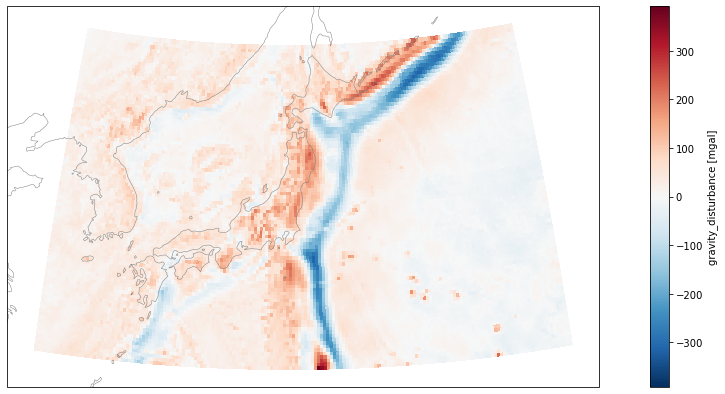

In [14]:
plt.figure(figsize=(18, 7))
ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=35, central_longitude=140))
plot = japan.gravity_disturbance.plot(ax=ax, transform=ccrs.PlateCarree())
ax.coastlines(color="gray", linewidth=0.5)

And we can repeat our modelling calculations for this smaller section of the data using our function from before.

In [15]:
prediction_japan = bouguer_topo_isostasy(japan.topography, density_crust=2670, density_water=1040)

Text(0, 0.5, 'Bouguer gravity disturbance (mGal)')

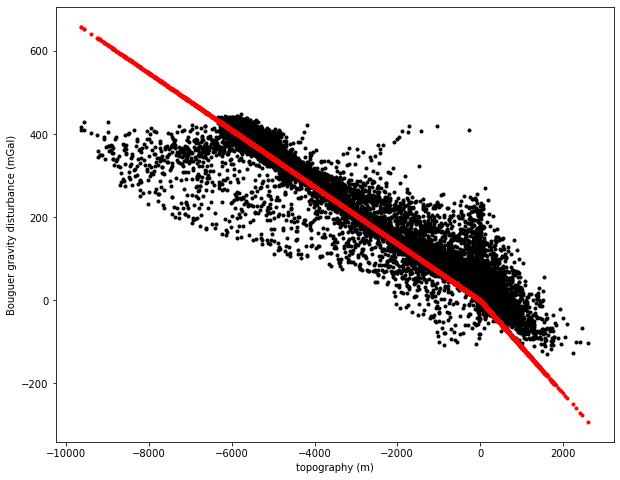

In [16]:
plt.figure(figsize=(10, 8))
plt.plot(japan.topography.values.ravel(), japan.gravity_bouguer.values.ravel(), ".k")
plt.plot(japan.topography.values.ravel(), prediction_japan.values.ravel(), ".r")
plt.xlabel("topography (m)")
plt.ylabel("Bouguer gravity disturbance (mGal)")

In [17]:
prediction_japan_smooth = bouguer_topo_isostasy(japan.topography_smoothed, density_crust=2670, density_water=1040)

Text(0, 0.5, 'Bouguer gravity disturbance (mGal)')

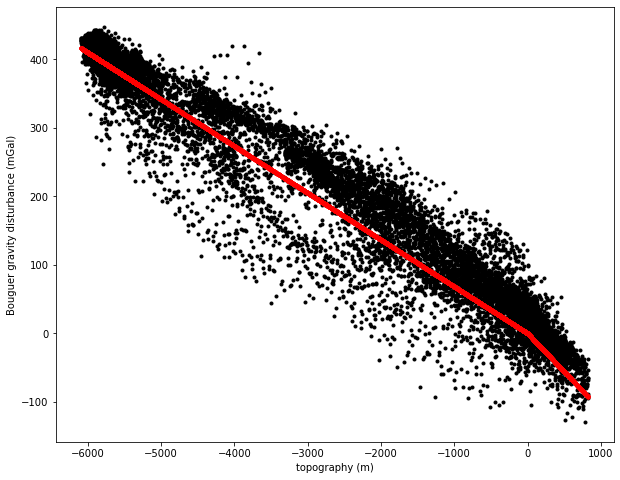

In [18]:
plt.figure(figsize=(10, 8))
plt.plot(japan.topography_smoothed.values.ravel(), japan.gravity_bouguer.values.ravel(), ".k")
plt.plot(japan.topography_smoothed.values.ravel(), prediction_japan_smooth.values.ravel(), ".r")
plt.xlabel("topography (m)")
plt.ylabel("Bouguer gravity disturbance (mGal)")

As expected, the model fits the data better if we use a smoothned version of the topography. This removes at lot of the short-wavelength signal from the subduction zone. But even then, the fit to oceanic areas is still poor. This can be explained by the downward flexure of the lithosphere at the subduction zone. The bathymetry we observe there is **not due to isostasy** but instead due to the force of the Pacific subcting underneath Japan.

---

## **Your turn!**

In groups:

1. Choose a region of the Earth (between 10 - 20 degrees wide/tall) and make a slice of the global grids.
1. Calculate the predicted Airy gravity vs topography function and compare against the available data. 
1. Discuss **why** this region is or is not in isostatic equilibrium based on our modelling results. 
1. Share you results and main discussion points with the class.

---

## On your own: Explore different regions 

Now you have the data and code to model gravity vs topography in cases with isostaic equilibrium. Use this freedom to investigate the isostatic state of different geologic settings. Do some exploring on your own time and try to connect what you find with concepts you've learned or researched about the geologic setting of each region.

Here are some places you can try:

* Mid-ocean ridges
* Rift valleys
* Mountain ranges
* Large depressions in the continents
* Cratonic areas at the center of large continents
* Subduction zones

Use the cells below to write your code (add more if needed with the `+` button in the toolbar).